# DAY 14

## [作業目標]
- 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram
- 試著調整資料, 並利用提供的程式繪製分布圖

## [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

## [課後補充]

#### Subplot: https://matplotlib.org/examples/pylab_examples/subplots_demo.html
- matplotlib 官方介紹 subplot 的排版範例，裡面有縱向並列，橫向並列等各式排版，還附上對應的語法。如果同學使用的方式並不複雜，可以在此直接查詢套用。

#### Complex subplot: https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
- 如果需要複雜一點的 subplot，這個網頁有一些更詳細的寫法，也包含了下圖這種奇怪的排版方式。並不是要同學故意去學習這種奇怪的排版，而是當您有特殊的排版需求時，可以查詢這些內容，組合出您需要的排版語法。

#### Seaborn.jointplot: https://seaborn.pydata.org/generated/seaborn.jointplot.html
- 除了圖本身的排版，搭配排版的圖組，有時也是不錯的選擇。

- 例如最經典的 Seaborn.jointplot，除了繪製兩個變數間的散佈圖外，變數本身的分布長條圖，也會列在對應的軸上，讓人一目了然，中央的散佈圖也有點狀 / 等高線 / 蜂巢等不同選擇。EDA 的**重點是讓人看懂資料**，因此圖形**是否直覺**是相當重要的一環

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
sub_df = app_train.loc[~app_train['HOUSETYPE_MODE'].isnull(), ['HOUSETYPE_MODE','AMT_CREDIT']].sort_values(by = 'AMT_CREDIT')\

,HOUSETYPE_MODE,AMT_CREDIT
129799,block of flats,45000.0
48937,block of flats,45000.0
64895,block of flats,45000.0
124653,block of flats,45000.0
276612,block of flats,45000.0


**Draw Histogram of Counts of AMT_CREDIT, divided by HOUSETYPE_MODE. To see the distribution of credit in each housetype**

In [97]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版

unique_house_type = sub_df.loc[~sub_df['HOUSETYPE_MODE'].isnull(),'HOUSETYPE_MODE'].unique()
print("There're %i types of house, which is: %s" %(len(unique_house_type), unique_house_type))

There're 3 types of house, which is: ['block of flats' 'specific housing' 'terraced house']


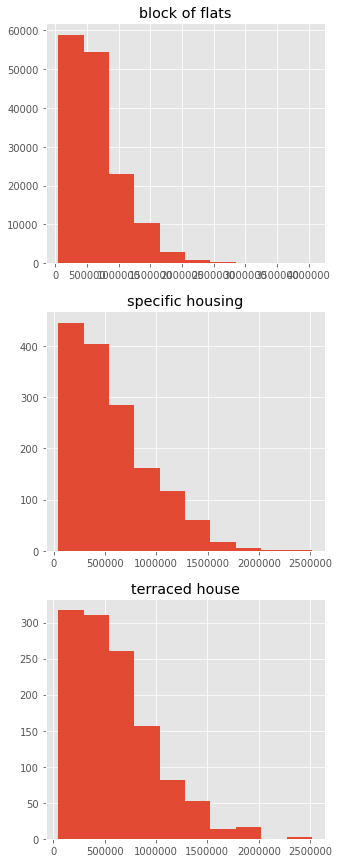

In [105]:
# Create subplot array
nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(5,15))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    sub_df.loc[sub_df['HOUSETYPE_MODE'] == unique_house_type[i] , 'AMT_CREDIT'].hist()
    
    plt.title(str(unique_house_type[i]))
    
plt.show()    